In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import abroad.machine_learning as ML
import os
from datetime import datetime
import textwrap

In [51]:
df7_dir = './data/df_7/'
df13_dir = './data/df_13/'

## All Artefacts ##

In [52]:
targets = {"All": ['Control', 'Horizontal', 'Vertical', 'Pressure',
                         'Frown', 'Ambient Light', 'Torch Light'],
          "Light":['Control', 'Ambient Light', 'Torch Light'],
      "Motion":['Control', 'Horizontal', 'Vertical', 'Pressure',
                         'Frown']}

artefact_key = {"All": " ",
               "Light": " light ",
               "Motion": " motion "}

In [53]:
features = [{"data":pd.read_csv(os.path.join(df7_dir,'parallel_features_7_%s.csv'%(x)), index_col=0),"sensor": 7, "targets":targets[x], "artefact": artefact_key[x]} for x  in ['All', 'Light', 'Motion']]

In [54]:
features.extend([{"data":pd.read_csv(os.path.join(df13_dir,'parallel_features_13_%s.csv'%(x)), index_col=0),"sensor": 13, "targets":targets[x], "artefact": artefact_key[x]} for x  in ['All', 'Light', 'Motion']])

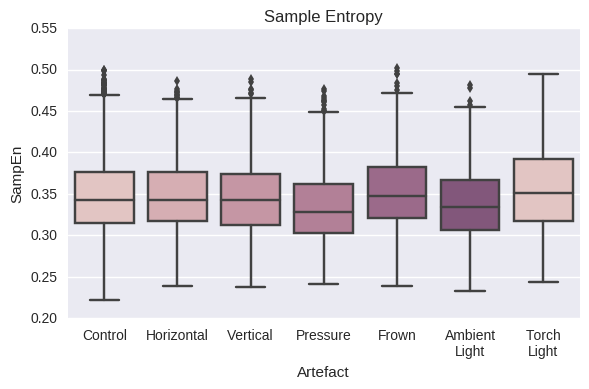

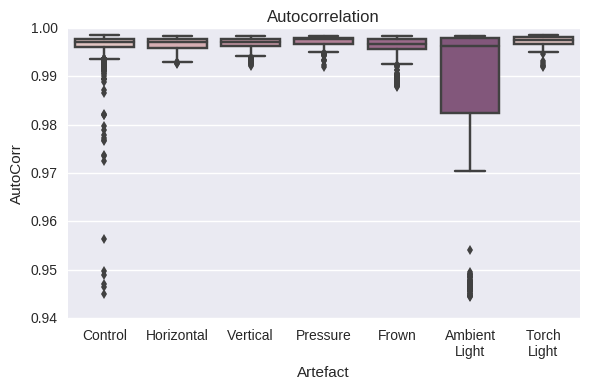

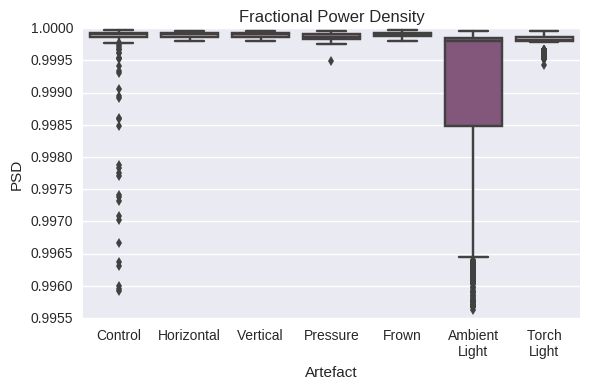

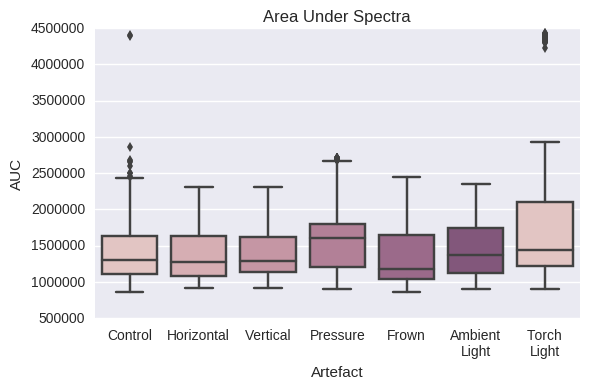

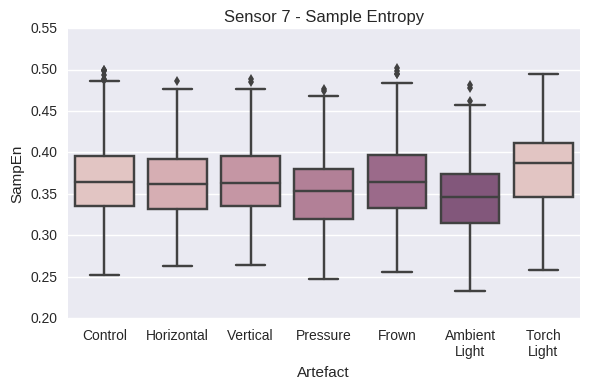

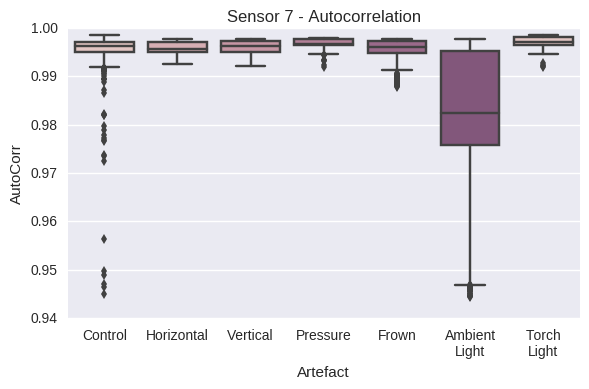

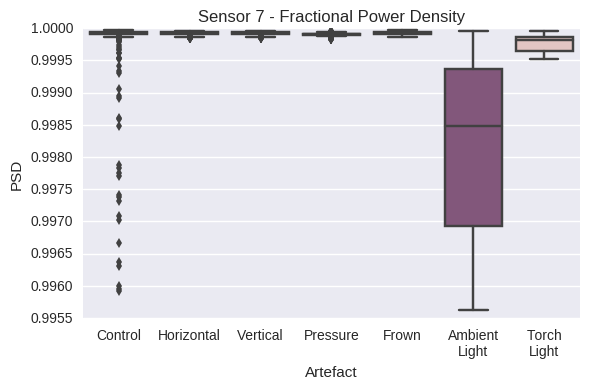

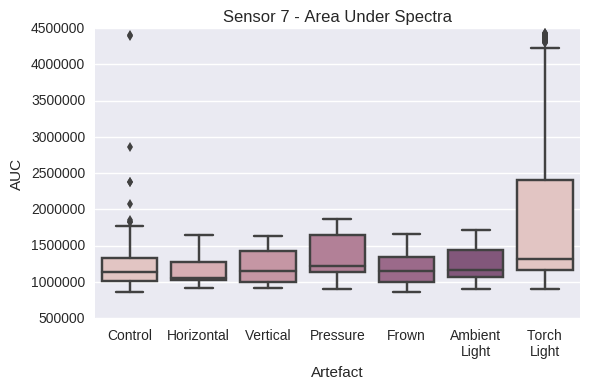

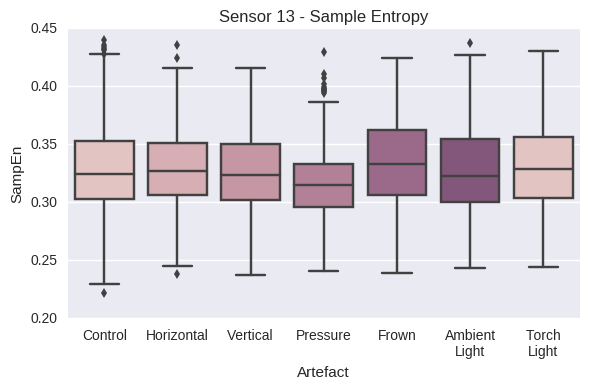

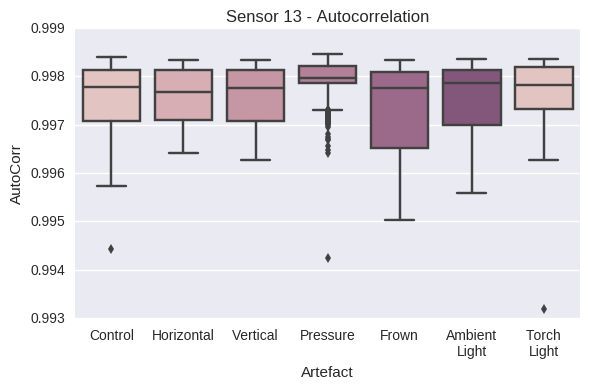

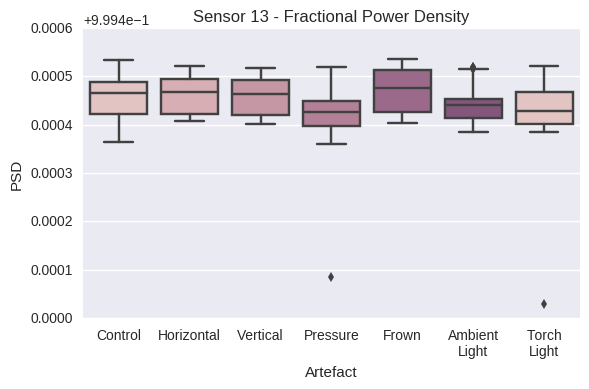

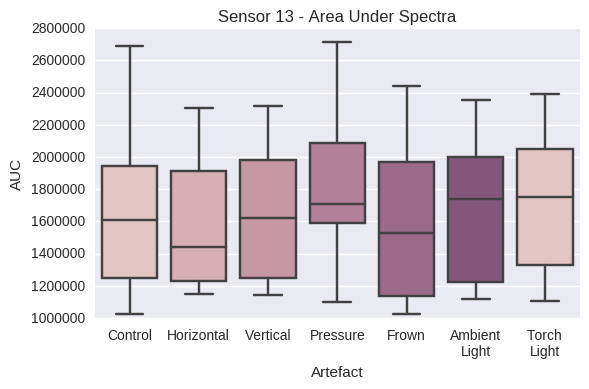

In [72]:
def artefact_name(x):
    print(targets['All'][int(x['Artefact'])])
    #return x['Artefact']=targets['All'][x['Artefact']]
    
feat_dict={'AUC': 'Area Under Spectra', 'PSD': "Fractional Power Density", 'AutoCorr': "Autocorrelation", 'SampEn': "Sample Entropy"}
cmap = sns.cubehelix_palette(dark=0.4, light=0.8)
for df in [pd.concat([features[0]['data'],features[3]['data']])]:
    for k, v in feat_dict.items():
        ax = sns.boxplot(x='Artefact', y=k, data=df[['Artefact',k]], palette=cmap)
        plt.title('{}'.format(v))
        ax.set_xticklabels([textwrap.fill(targets['All'][int(i.get_text())],10) for _, i in enumerate(ax.get_xticklabels())])
        plt.tight_layout()
        plt.savefig("/home/buck06191/Dropbox/phd/ABroAD/Figures/{}.png".format(k), orientation="landscape")
        plt.show()
    
for df in [features[0],features[3]]:
    for k, v in feat_dict.items():
        ax = sns.boxplot(x='Artefact', y=k, data=df['data'][['Artefact',k]], palette=cmap)
        plt.title('Sensor {} - {}'.format(df['sensor'],v))
        ax.set_xticklabels([textwrap.fill(targets['All'][int(i.get_text())],10) for _, i in enumerate(ax.get_xticklabels())])
        plt.tight_layout()
        plt.savefig("/home/buck06191/Dropbox/phd/ABroAD/Figures/sensor{}-{}.png".format(df['sensor'],k), orientation="landscape")
        plt.show()

In [56]:
def pipeline(features):
    dt = datetime.now()
    date ="".join(filter(lambda char: char.isdigit(), str(dt)))[:14] 
    split_data = ML.test_train_split(features['data'])
    fpr, tpr, auroc, n_classes, clf = ML.classification(split_data[0])
    ML.ROC_plot(fpr, tpr, auroc, n_classes, date , features['targets'], features['artefact'], features['sensor'], 'Training')
    fpr, tpr, auroc, n_classes, predictions = ML.final_test(split_data[1], clf)
    ML.ROC_plot(fpr, tpr, auroc, n_classes, date, features['targets'], features['artefact'], features['sensor'], 'Test')

    return True

/home/buck06191/anaconda3/envs/data/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.336906919672


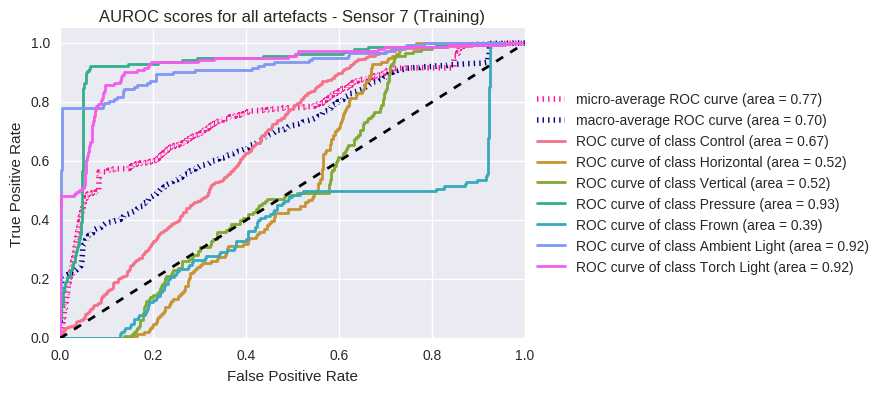

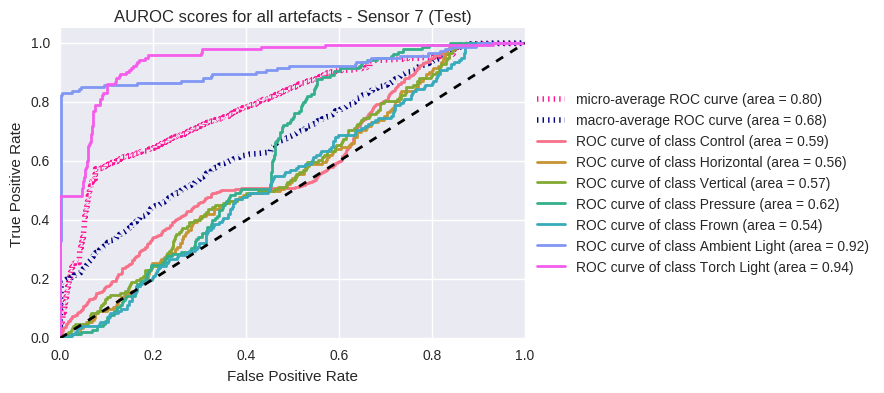

/home/buck06191/anaconda3/envs/data/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.643154367285


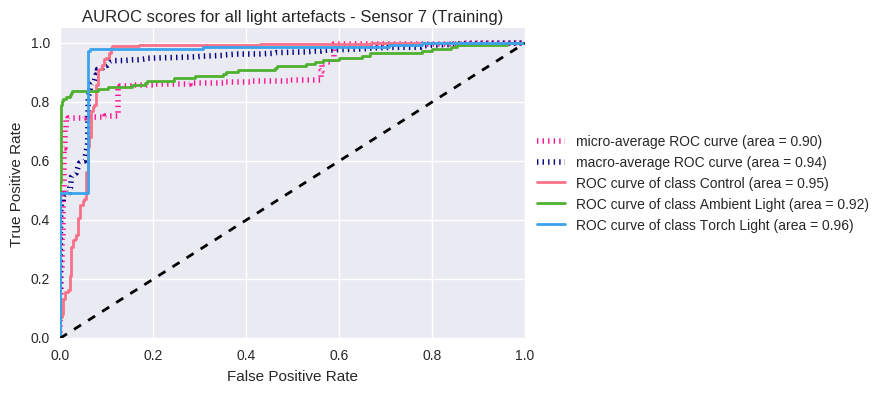

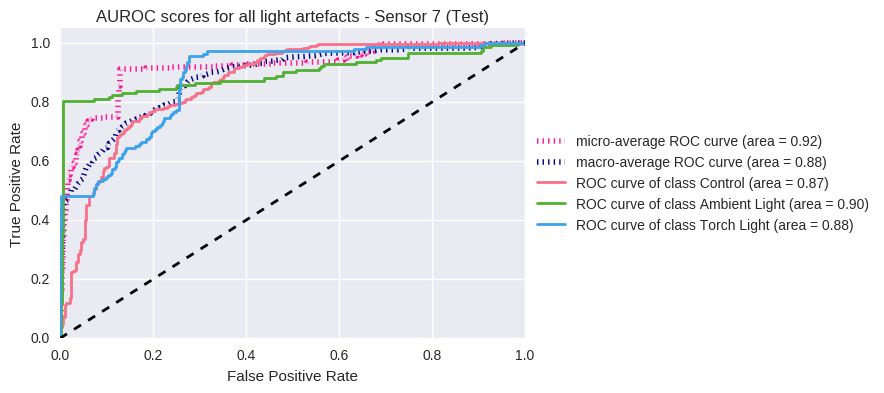

/home/buck06191/anaconda3/envs/data/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.448259925954


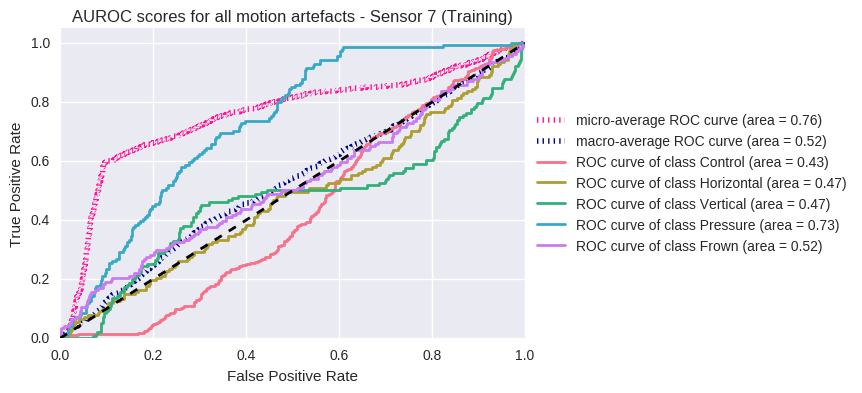

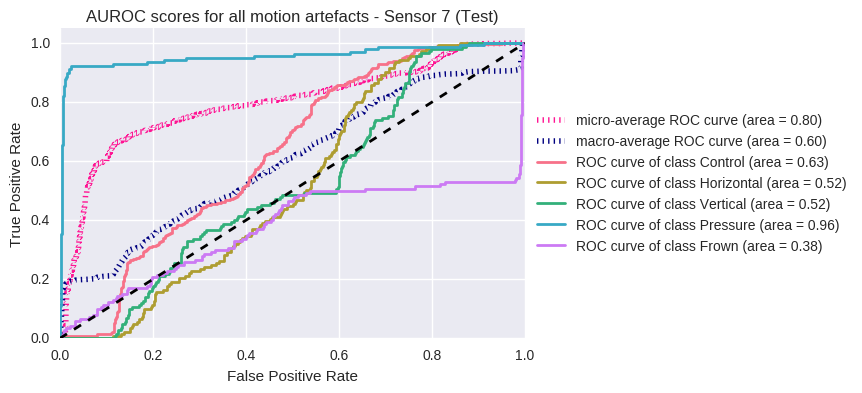

/home/buck06191/anaconda3/envs/data/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.336591068954


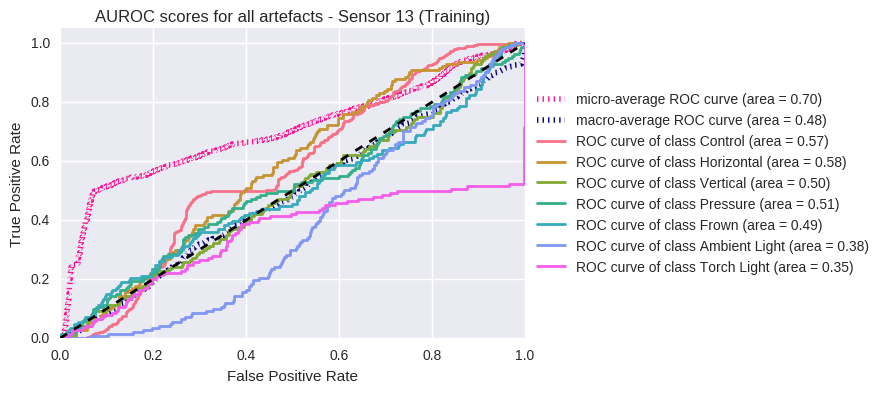

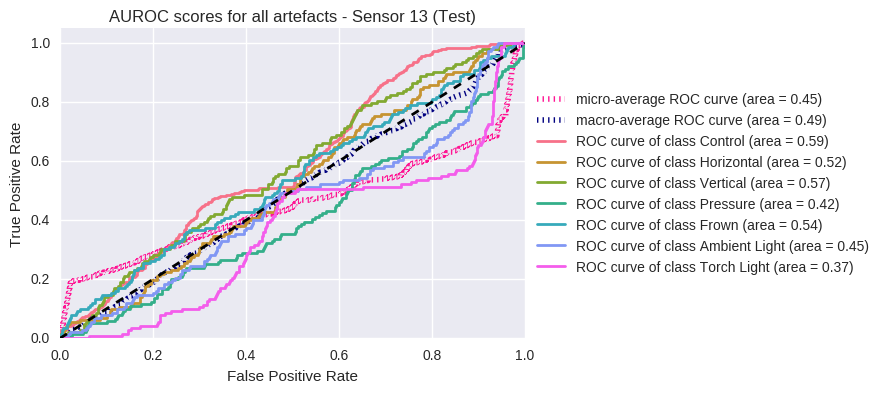

/home/buck06191/anaconda3/envs/data/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.649128635232


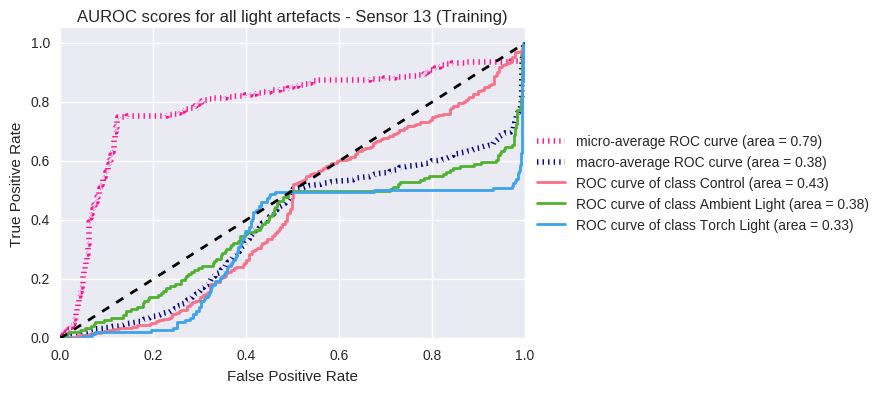

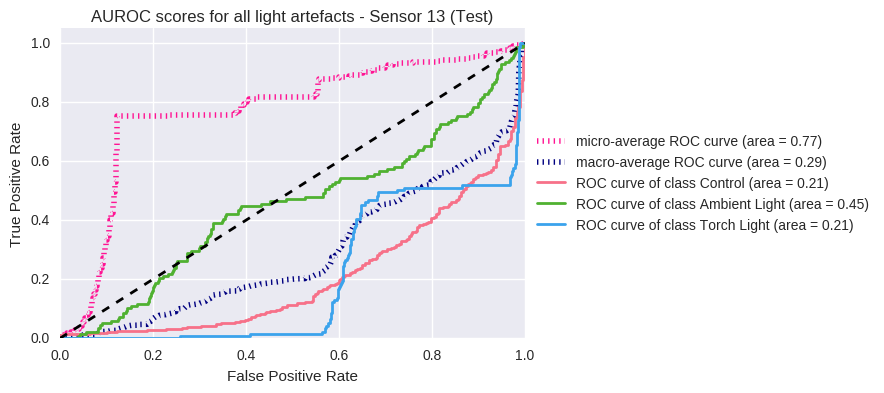

/home/buck06191/anaconda3/envs/data/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.450867684966


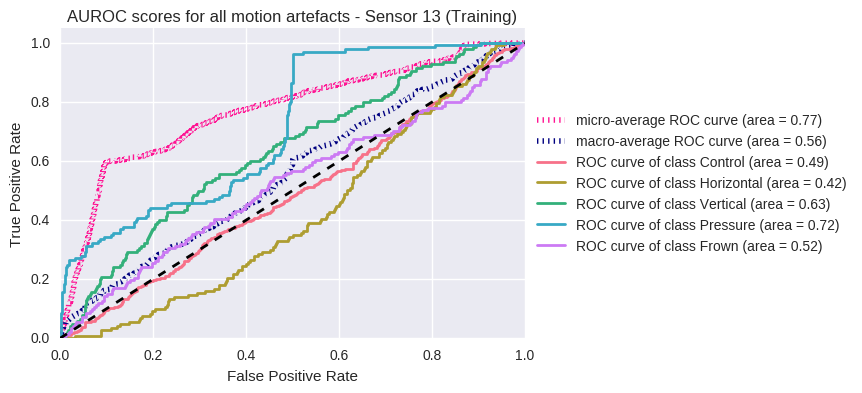

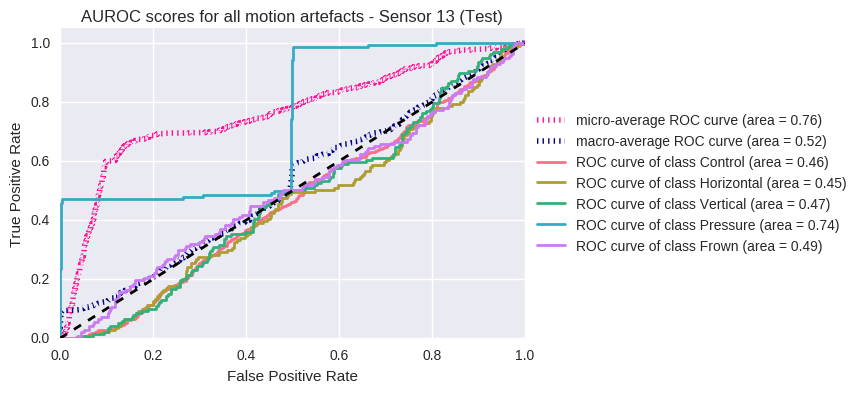

In [10]:
for df in features:
    pipeline(df)
    plt.show()

# Misc Figures

In [11]:
def block_allocator(df):
    i = 0
    prev = 0
    for idx, x in enumerate(df['Artefact']):
        if x == prev:
            df.loc[idx, 'Block'] = int(i)
        else:
            i+=1
            df.loc[idx, 'Block'] = int(i)
        prev = int(x)
    return df

test_df = pd.DataFrame({"Artefact": [0,0,0,1,1,1,2,2,2,1,1,1,4,4,4]})
block_allocator(test_df)

,Artefact,Block
0,0,0.0
1,0,0.0
2,0,0.0
3,1,1.0
4,1,1.0
5,1,1.0
6,2,2.0
7,2,2.0
8,2,2.0
9,1,3.0


In [12]:
conc_df = pd.read_csv('./data/conc_subject_1.csv', names= ['HbO2 (uM)', 'HHb (uM)', 'oxCCO (uM)', 'HbT (uM)', 'Artefact', 'Subject'], skiprows=1)
conc_df['Time (sec)'] = np.arange(0,conc_df.shape[0]/5,0.2)
conc_df = block_allocator(conc_df)
artefact_names = ['Control', 'Horizontal Motion', 'Vertical Motion', 'Pressure', 'Frowning', 'Ambient Light', 'Torch Light'] 
conc_df['Artefact'] = [artefact_names[x] for x in conc_df['Artefact']]

In [13]:
def artefact_plot(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    for block in set(data['Block']):
        data[data['Block']==block].plot(x=x, y=y, ax=ax, **kwargs)

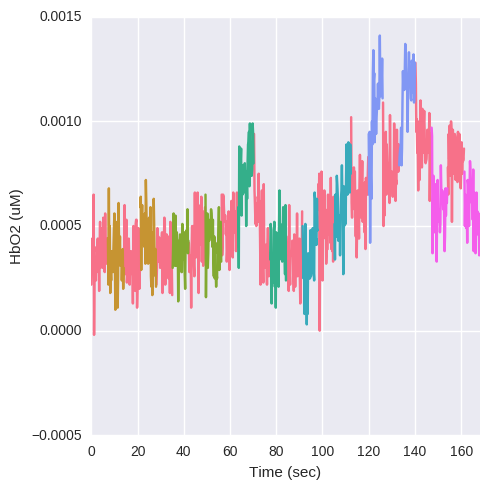

In [14]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
colors = sns.color_palette("Set1", 7)
g = sns.FacetGrid(conc_df, hue='Artefact', size=5, xlim=(0,170), ylim = (-0.0005,0.0015))
g.map_dataframe(artefact_plot, 'Time (sec)', 'HbO2 (uM)')

/home/buck06191/anaconda3/envs/data/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.337875672048


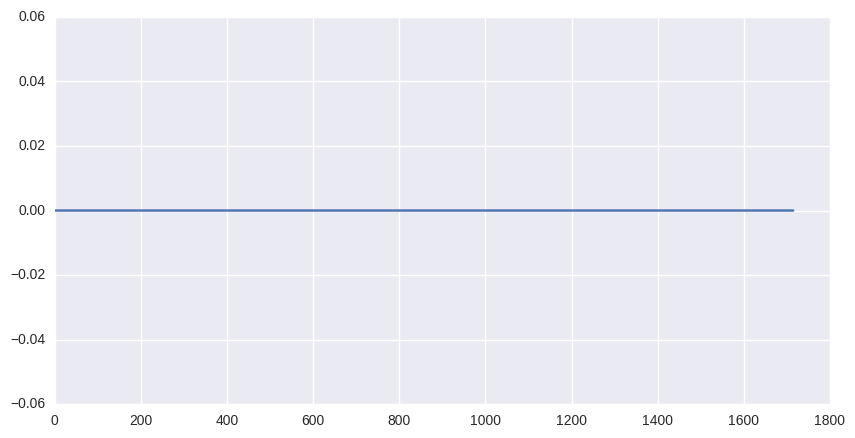

/home/buck06191/anaconda3/envs/data/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.746034476325


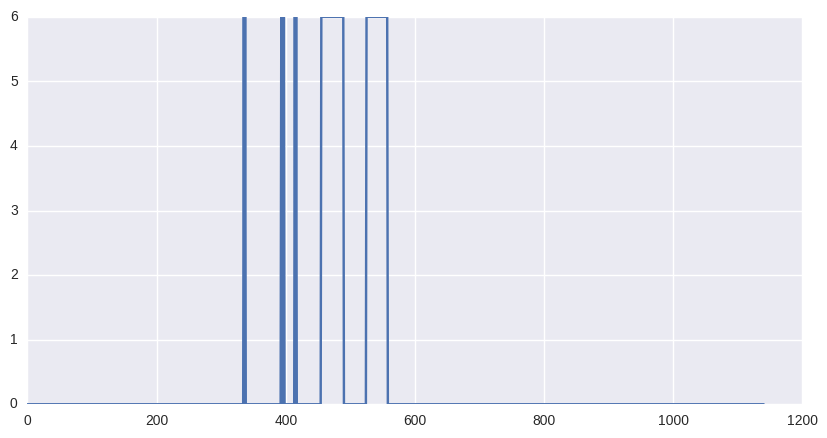

/home/buck06191/anaconda3/envs/data/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.448259925954


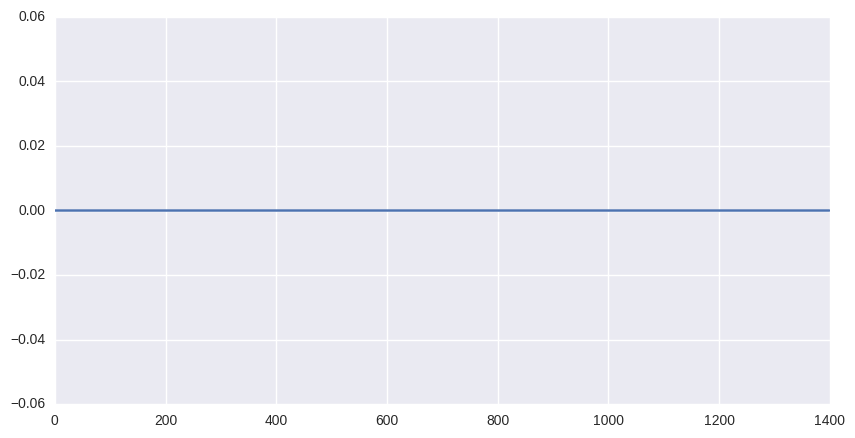

/home/buck06191/anaconda3/envs/data/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.331353452994


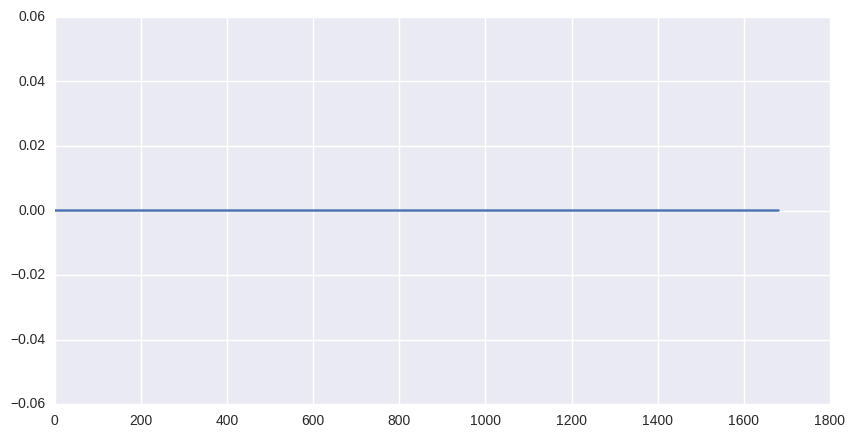

/home/buck06191/anaconda3/envs/data/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.64669675723


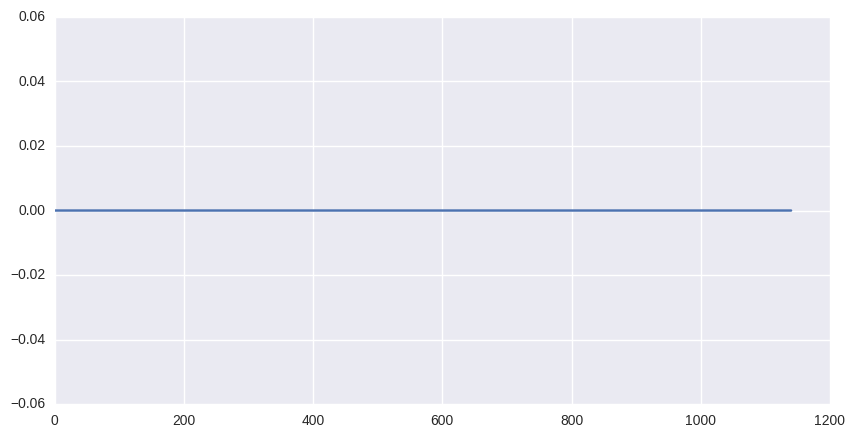

/home/buck06191/anaconda3/envs/data/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.454444485218


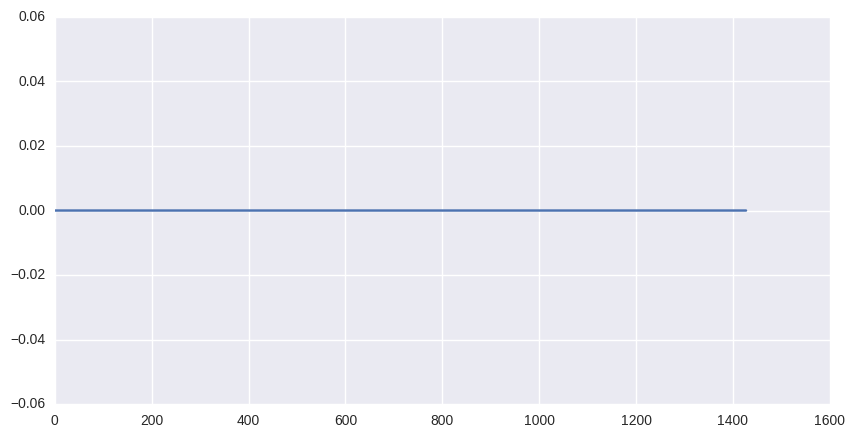

In [18]:
def pipeline(features):
    split_data = ML.test_train_split(features['data'])
    fpr, tpr, auroc, n_classes, clf = ML.classification(split_data[0])
    fpr, tpr, auroc, n_classes, predictions = ML.final_test(split_data[1], clf)
    plt.plot(predictions)
    plt.show()
    return True
for df in features:
    pipeline(df)